# Cyclone BOB01 1991 Time Series
1991 file in `/data/1991TS`, should work with any file though

In [67]:
import netCDF4 as nc
from rich import print

PATH = '../sample_data/1991TS'
FILENAME = 'tas.T24Hmax.UMRA2T.19910428_19910501.BOB01.1p5km.nc'

In [56]:
import netCDF4 as nc

fn = f"{PATH}/{FILENAME}"
ds = nc.Dataset(fn)
ds.__dict__


{'rim_removed': '13 point rim removed',
 'um_version': '11.1',
 'source': 'Copernicus Climate Change Service Information (C3S) ECMWF ERA5 / Met Office UM RA2T CON',
 'Conventions': 'CF-1.7',
 'contact': 'enquiries@metoffice.gov.uk',
 'comment': 'Supported by the International Climate Initiative (IKI) and the Federal Ministry for the Environment, Nature Conservation and Nuclear Safety, based on a decision of the Germany Bundestag',
 'data_type': 'grid',
 'date_created': '20192730T15:27:10',
 'geospatial_lat_max': '39.957',
 'geospatial_lat_min': '8.002501',
 'geospatial_lat_resolution': '0.04',
 'geospatial_lat_units': 'degrees_north',
 'geospatial_lon_max': '105.362',
 'geospatial_lon_min': '72.597496',
 'geospatial_lon_resolution': '0.04',
 'geospatial_lon_units': 'degrees_east',
 'history': '(1.0) Initial release',
 'id': 'tas.T24Hmax.UMRA2T.19910428_19910501.BOB01.1p5km.nc',
 'institution': 'Met Office, UK',
 'keywords': 'Bangladesh, dynamical downscaling, RA2T, Met Office',
 'produ

In [57]:
print("[bold red] Dimensions")
for dim in ds.dimensions.values():
    print(dim)

print("[bold red] Variables")
for var in ds.variables.values():
    print(var)

 Dimensions

<class 'netCDF4._netCDF4.Dimension'>: name = 'forecast_period', size = 2

<class 'netCDF4._netCDF4.Dimension'>: name = 'forecast_reference_time', size = 9

<class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 790

<class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 810

<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2

 Variables

<class 'netCDF4._netCDF4.Variable'>
float32 air_temperature(forecast_period, forecast_reference_time, latitude, longitude)
    standard_name: air_temperature
    units: K
    um_stash_source: m01s03i236
    cell_methods: time: maximum
    grid_mapping: latitude_longitude
    coordinates: height time
unlimited dimensions: 
current shape = (48, 9, 790, 810)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
int32 latitude_longitude()
    grid_mapping_name: latitude_longitude
    longitude_of_prime_meridian: 0.0
    earth_radius: 6371229.0
    proj4: +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used

<class 'netCDF4._netCDF4.Variable'>
float64 forecast_period(forecast_period)
    bounds: forecast_period_bnds
    units: hours
    standard_name: forecast_period
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 forecast_period_bnds(forecast_period, bnds)
unlimited dimensions: 
current shape = (2, 2)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 forecast_reference_time(forecast_reference_time)
    axis: T
    units: hours since 1970-01-01 00:00:00
    standard_name: forecast_reference_time
    calendar: gregorian
unlimited dimensions: 
current shape = (9,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    axis: Y
    units: degrees_north
    standard_name: latitude
unlimited dimensions: 
current shape = (790,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    axis: X
    units: degrees_east
    standard_name: longitude
unlimited dimensions: 
current shape = (810,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 height()
    units: m
    standard_name: height
    positive: up
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 time(forecast_reference_time, forecast_period)
    bounds: time_bnds
    units: hours since 1970-01-01 00:00:00
    standard_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (9, 2)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(forecast_reference_time, forecast_period, bnds)
unlimited dimensions: 
current shape = (9, 2, 2)
filling on, default _FillValue of 9.969209968386869e+36 used

## Variables
Listed above are all the variables for the dataset, although I have no idea how they actually work \
Maybe the parameters they describe are column indicies

In [58]:
ds["forecast_reference_time"][0].data

array(186876.)

## Initial visualisation

Latitude vs Longitude vs Air temp

In [59]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider



In [64]:
lat = ds.variables["latitude"][:]
long = ds.variables["longitude"][:]
Z = ds.variables["wind_speed_of_gust"][:][0]

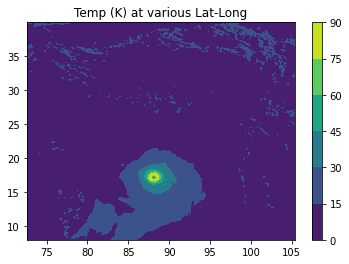

In [65]:
fig, ax = plt.subplots()
colour = Z[3]

cntr = ax.contourf(long, lat, colour)

fig.colorbar(cntr, ax=ax)
ax.set_title("Temp (K) at various Lat-Long")
plt.show()

## Animation
https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30

In [ ]:
import imageio
import os

PATH = "../data/1991TS"
FILENAME = "fg.T1Hmax.UMRA2T.19910428_19910501.BOB01.4p4km.nc"

fn = f"{PATH}/{FILENAME}"
ds = nc.Dataset(fn)

In [66]:
filenames = []
for idx, frame in enumerate(Z):
    plt.contourf(long, lat, frame)
    filename = f"sc{idx}.png"
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()
    
# build gif
with imageio.get_writer('vis.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)